# ARCH and GARCH Models

Juan Guzman

Analyzing the volatility dynamics of the S&P 500 index time series data using ARCH and GARCH models.

Modeling using the rugarch package in R.


In [ ]:
%load_ext rpy2.ipython`

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


# 1. Installing necessary packages for the analysis:

In [ ]:
%%R
install.packages('lubridate')
install.packages('tseries')
install.packages('forecast')
install.packages('zoo')
install.packages('lmtest')
install.packages('strucchange')
install.packages('quantmod')
install.packages('rugarch')

In [ ]:
%%R
library(lubridate)
library(tseries)
library(forecast)
library(zoo)
library(tidyverse)
library(lmtest)
library(strucchange)
library(quantmod)
library(rugarch)

# 2. Reading the necessary data:

Fetch the daily closing prices for the S&P 500 index from January 1, 2019 to April 1, 2024 from Yahoo Finance.


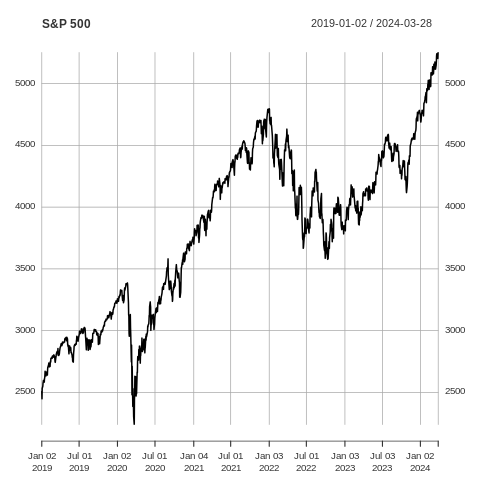

In [ ]:
%%R
getSymbols("^GSPC", src = "yahoo", from = "2019-01-01", to = "2024-04-01")

data <- Cl(GSPC)

# Extract dates
dates <- index(data)

data$dates <- dates

plot(data$GSPC.Close, data$dates, main = "S&P 500")

# 3. Calculating the daily log returns of the closing prices.

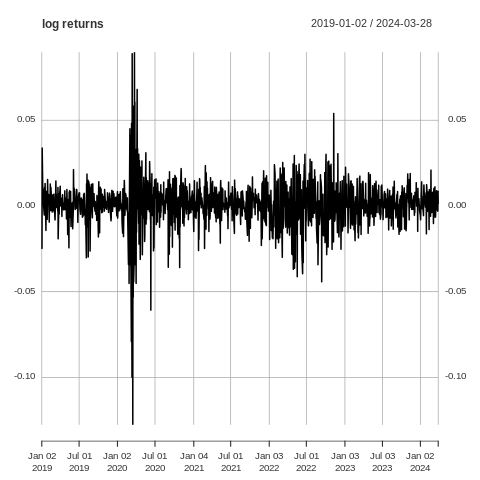

In [ ]:
%%R

log_returns <- diff(log(Ad(GSPC)))
plot(log_returns, data$dates, main = "log returns")


# 4. Cleaning the data including handling missing values or data anomalies.

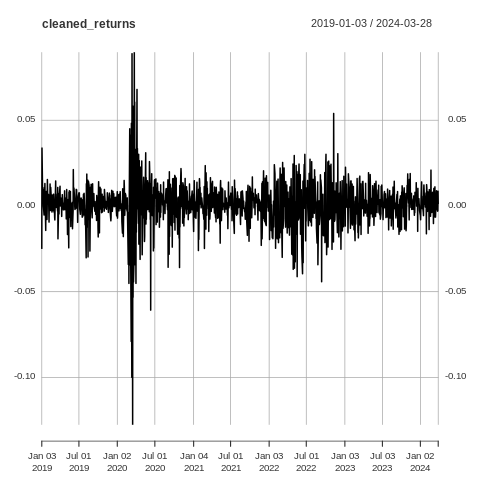

In [ ]:
%%R

cleaned_returns <- na.omit(log_returns)
plot(cleaned_returns, data$dates)

# 5. ACF and PACF Plots.

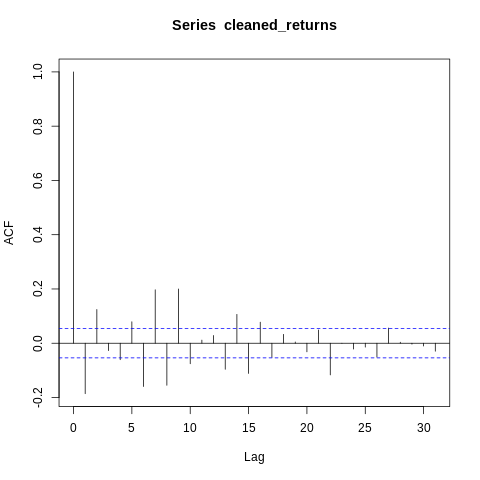

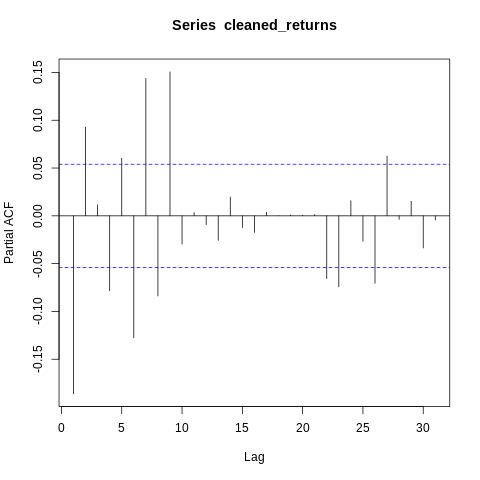

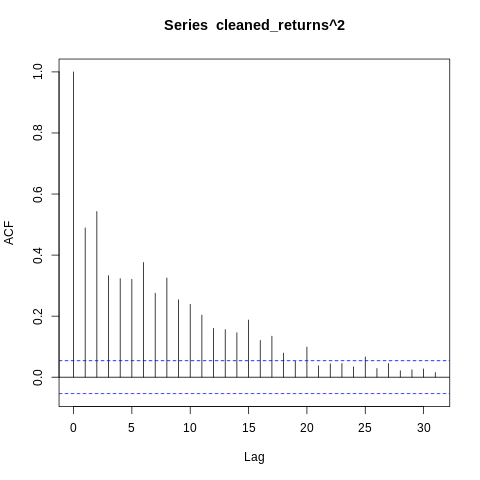

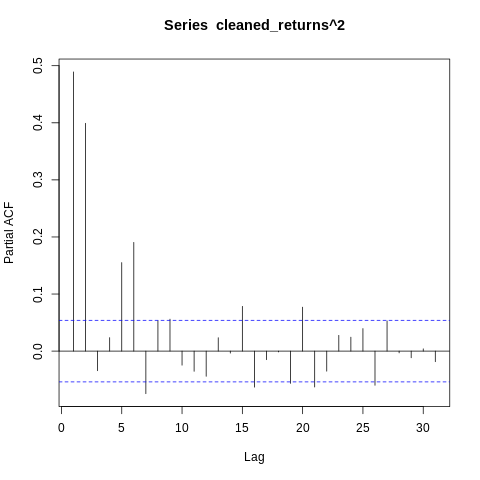

In [ ]:
%%R
acf(cleaned_returns)
pacf(cleaned_returns)

acf(cleaned_returns^2)
pacf(cleaned_returns^2)


For $y_t$ ACF seems drop immediately and the PACF has no clear correlations, hence the need to checl $y_t^2$ now, for ACF and PACF there seems to be an ARMA pattern because both decrease away

# 6. Specifying and fitting an ARCH model to the return series.

In [ ]:
%%R

# Specify ARCH model
arch_spec <- ugarchspec(variance.model = list(model = "sGARCH",
                                              garchOrder = c(1,0)),
                        mean.model = list(armaOrder = c(0,0),
                                          include.mean = TRUE),
                        distribution.model='norm')

# Fit ARCH model
arch_fit <- ugarchfit(spec = arch_spec, data = cleaned_returns)

summary(arch_fit)

print(arch_fit)


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,0)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error    t value Pr(>|t|)
mu      0.039317    0.000020 1982.40451  0.00000
omega   0.000000    0.000001    0.22672  0.82064
alpha1  0.856843    0.000201 4259.91673  0.00000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.039317     4.71247 0.008343  0.99334
omega   0.000000     0.20036 0.000001  1.00000
alpha1  0.856843   128.16499 0.006685  0.99467

LogLikelihood : 1762.836 

Information Criteria
------------------------------------
                    
Akaike       -2.6705
Bayes        -2.6587
Shibata      -2.6705
Hannan-Quinn -2.6660

Weighted Ljung-Box Test on Standardized Residuals
------------------------------------
   

The ARCH model captures some of the immediate impact of shocks on volatility but fails to account for more complex dynamics in the series.

The significant results in the diagnostic tests suggest the need for a more complex model that better model the persistence in volatility.

Also Pearson test results suggest that the model does not fit the distribution of the residuals well, and there are substantial deviations from the assumed normal distribution.


please wait...calculating quantiles...


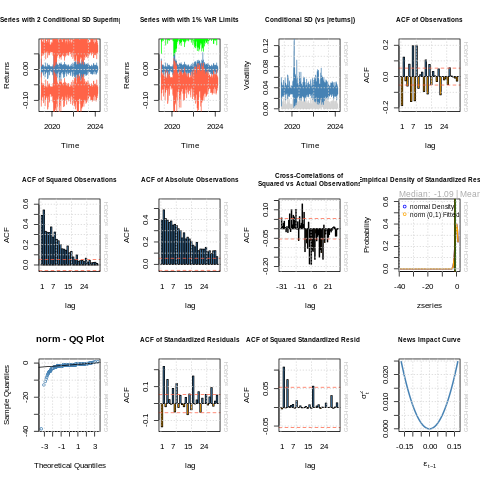

In [ ]:
%%R
plot(arch_fit, which = 'all')

Let's check every diagnostic plot


please wait...calculating quantiles...


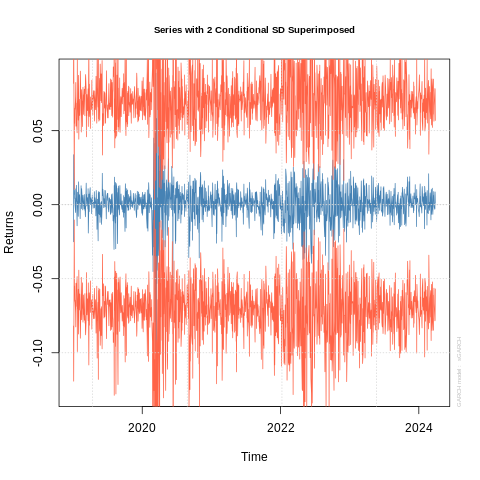

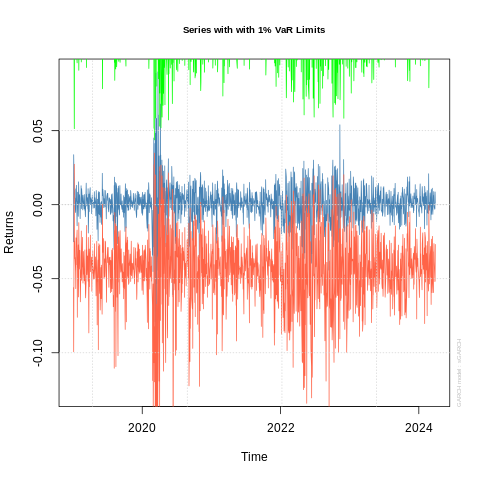

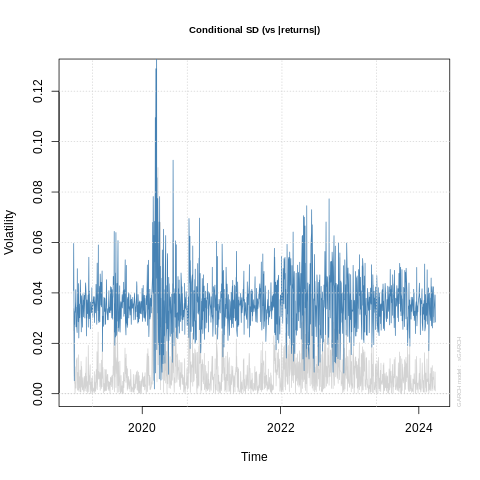

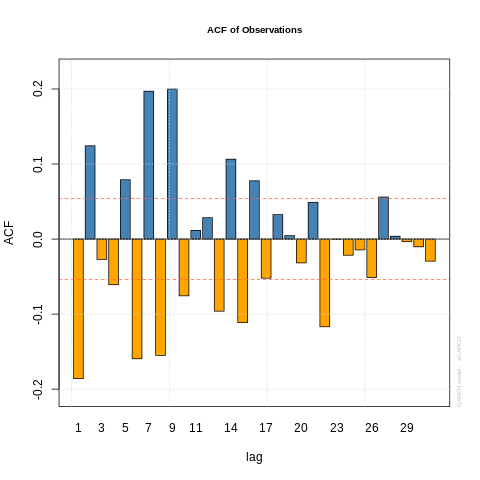

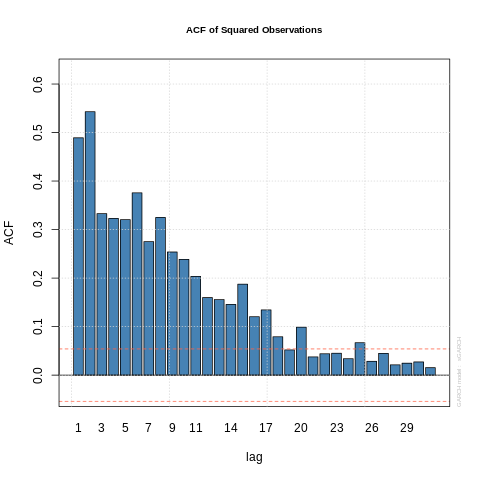

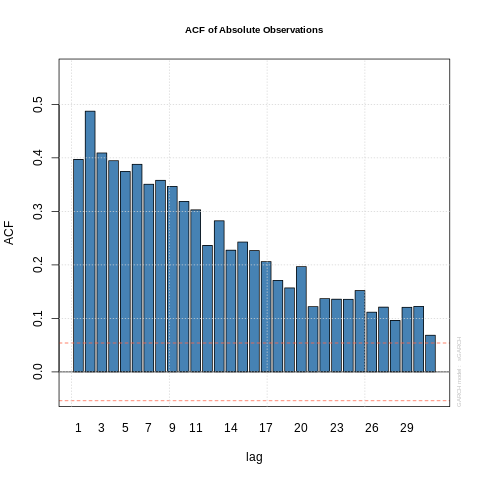

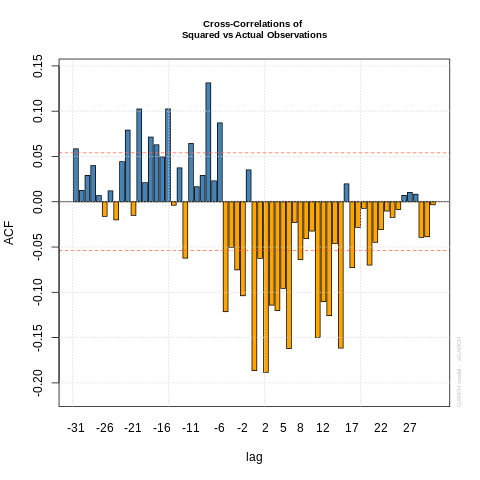

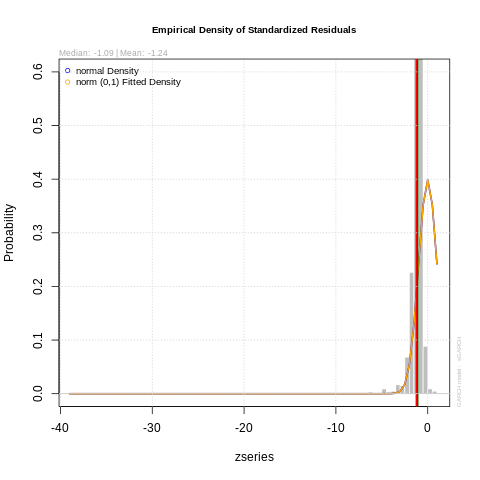

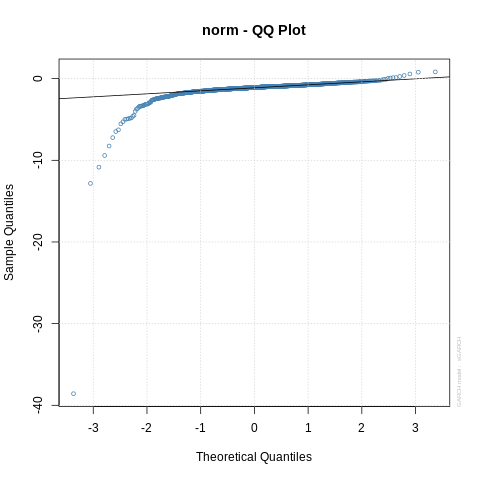

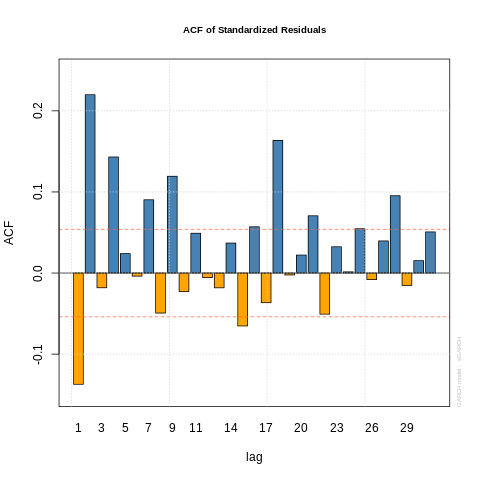

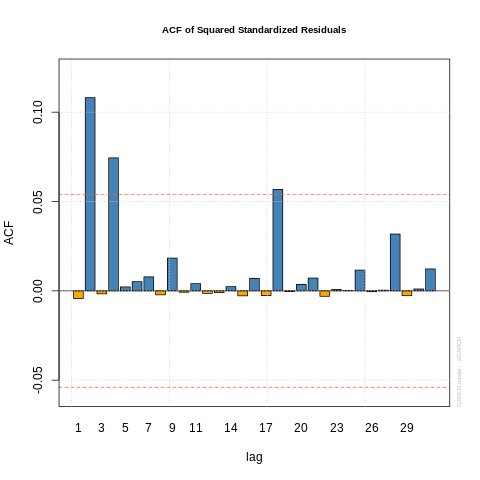

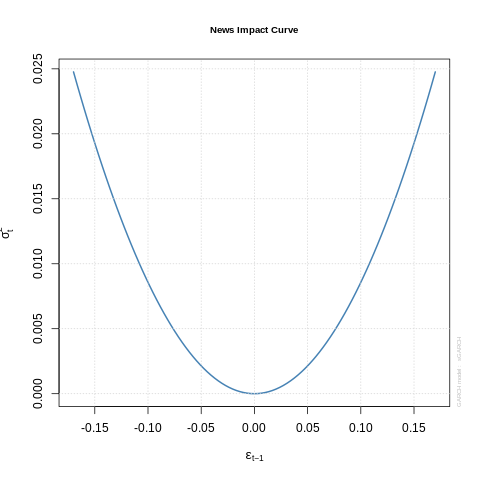

In [ ]:
%%R
plot(arch_fit, which = 1)
plot(arch_fit, which = 2)
plot(arch_fit, which = 3)
plot(arch_fit, which = 4)
plot(arch_fit, which = 5)
plot(arch_fit, which = 6)
plot(arch_fit, which = 7)
plot(arch_fit, which = 8)
plot(arch_fit, which = 9)
plot(arch_fit, which = 10)
plot(arch_fit, which = 11)
plot(arch_fit, which = 12)

# 7. Residual analysis for ARCH model


	Box-Ljung test

data:  arch_res
X-squared = 317.96, df = 20, p-value < 2.2e-16



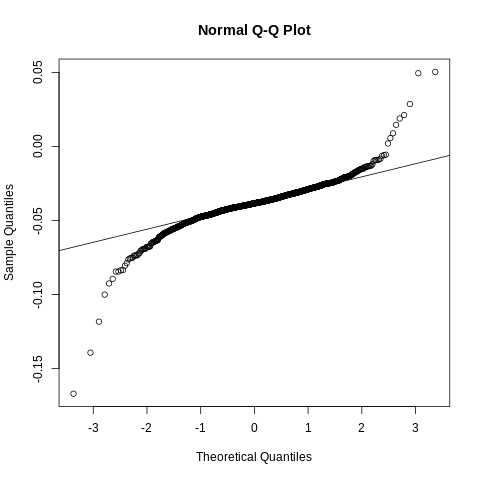

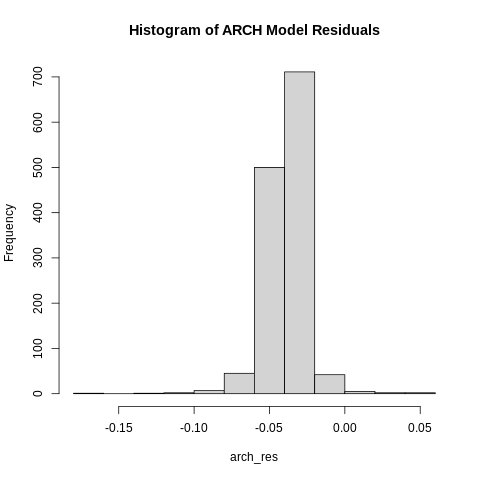

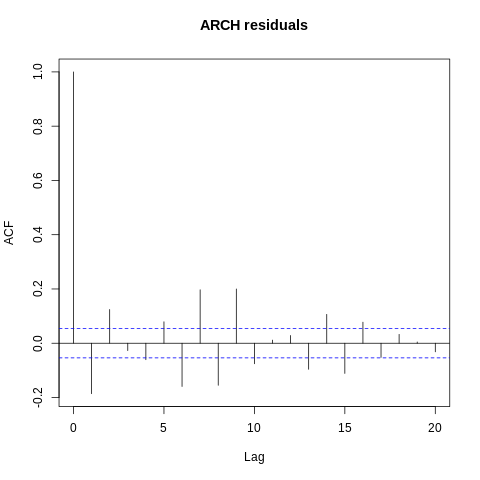

In [ ]:
%%R

arch_res <- residuals(arch_fit)

# Normality probability plot
qqnorm(arch_res)
qqline(arch_res)

# Histogram
hist(arch_res, main = "Histogram of ARCH Model Residuals")

acf(arch_res, lag.max=20, main = 'ARCH residuals')


In [ ]:
%%R
# Getting the same length to plot
data_diff <- data[-c(1), ]
#length(data_diff)
#length(arch_res)

[1] 1318


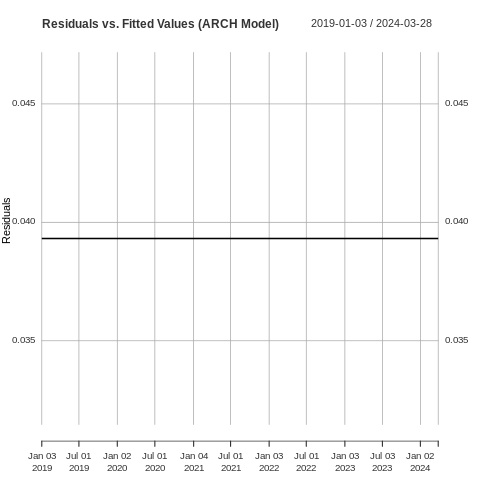

In [ ]:
%%R
# Residuals vs. Fitted Values
plot(fitted(arch_fit), arch_res, main = "Residuals vs. Fitted Values (ARCH Model)", xlab = "Fitted Values", ylab = "Residuals")

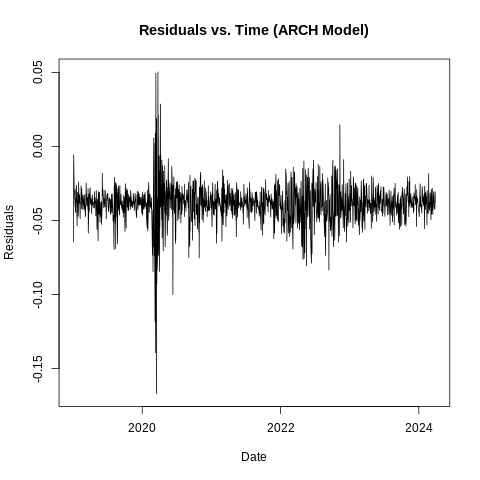

In [ ]:
%%R
# Residuals vs. Time
plot(index(data_diff), arch_res, main = "Residuals vs. Time (ARCH Model)", xlab = "Date", ylab = "Residuals", type ='l')

# 8. Specifying and fitting a GARCH model to the same return series.


In [ ]:
%%R

# Specify GARCH model
garch_spec <- ugarchspec(variance.model = list(model = "sGARCH",
                                               garchOrder = c(1,1)),
                         mean.model = list(armaOrder = c(0,0),
                                           include.mean = TRUE),
                         distribution.model = 'norm')

# Fit GARCH model
garch_fit <- ugarchfit(spec = garch_spec, data = cleaned_returns)

print(garch_fit)


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.000977    0.000231   4.2312 0.000023
omega   0.000004    0.000003   1.3809 0.167304
alpha1  0.178792    0.025620   6.9787 0.000000
beta1   0.794571    0.033949  23.4048 0.000000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.000977    0.000220  4.44672 0.000009
omega   0.000004    0.000016  0.28607 0.774823
alpha1  0.178792    0.035370  5.05491 0.000000
beta1   0.794571    0.123996  6.40801 0.000000

LogLikelihood : 4193.325 

Information Criteria
------------------------------------
                    
Akaike       -6.3571
Bayes        -6.3414
Shibata      -6.3571
Hannan-Quinn -6.3512

Weig

the GARCH model seems to capture the volatility dynamics well with significant parameter estimates for alpha1 and beta1, indicating decent modeling of volatility. However, the normality might require a more complex models.


please wait...calculating quantiles...


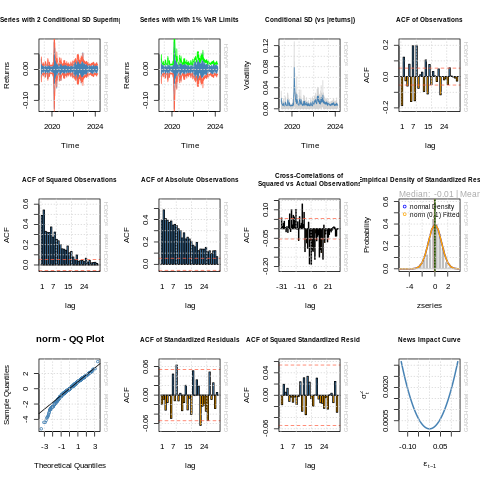

In [ ]:
%%R
plot(garch_fit, which = 'all')


please wait...calculating quantiles...


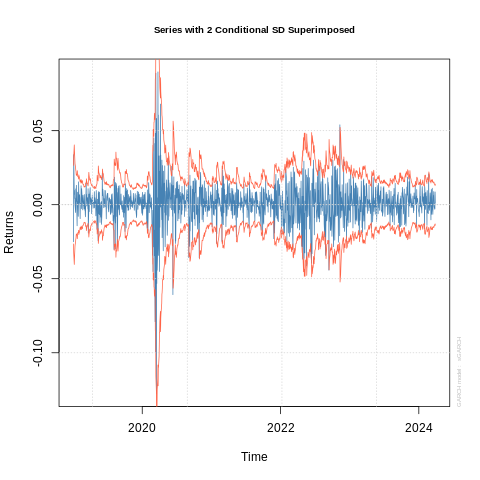

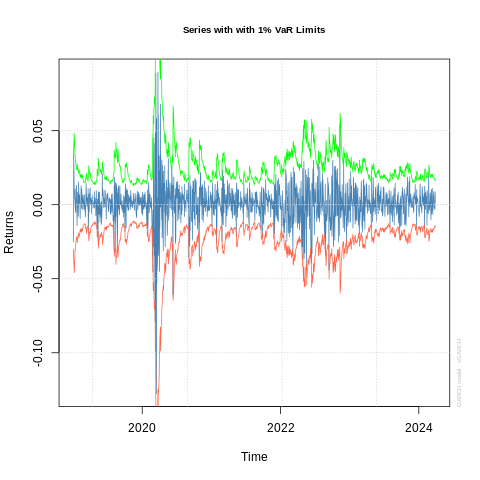

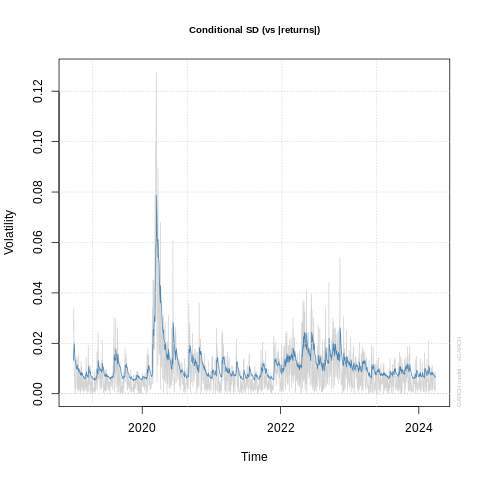

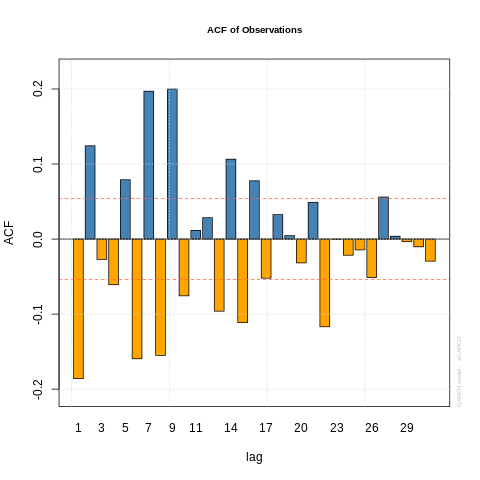

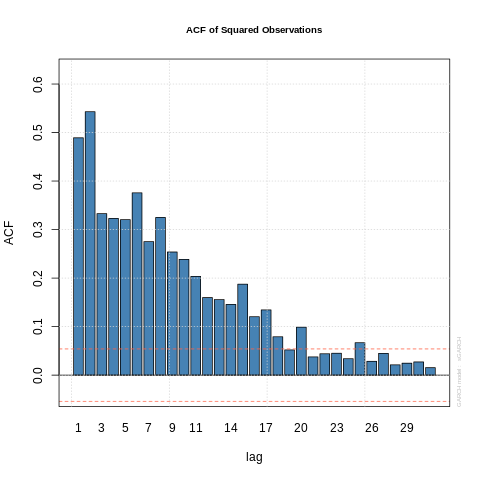

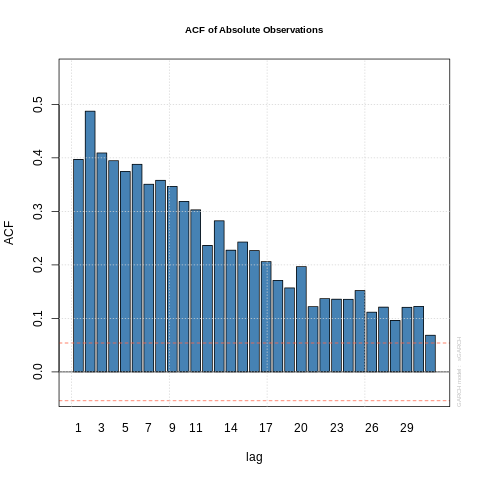

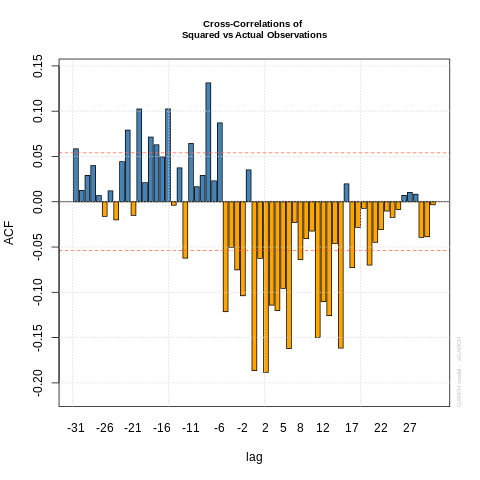

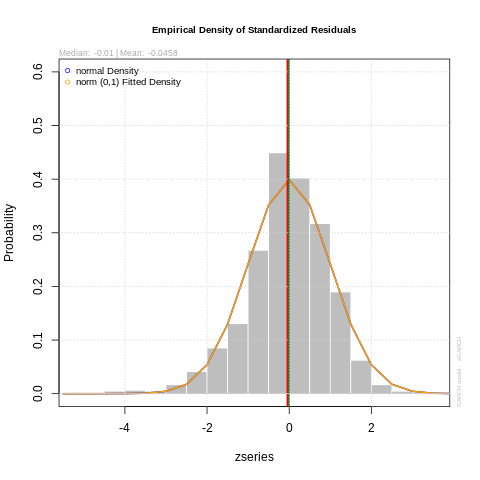

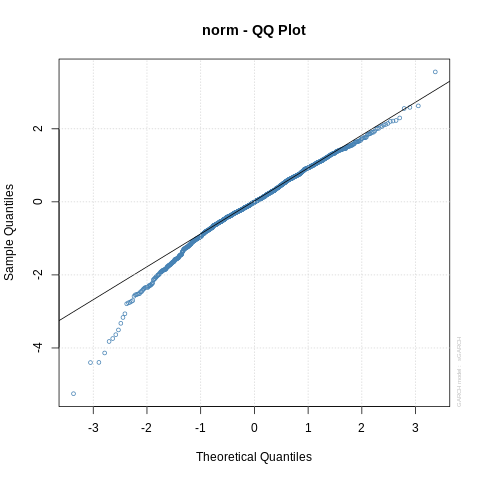

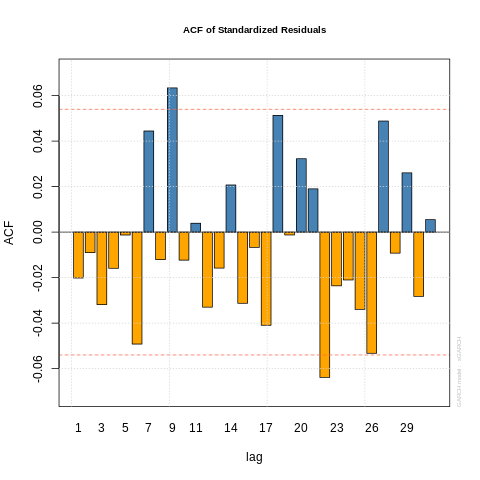

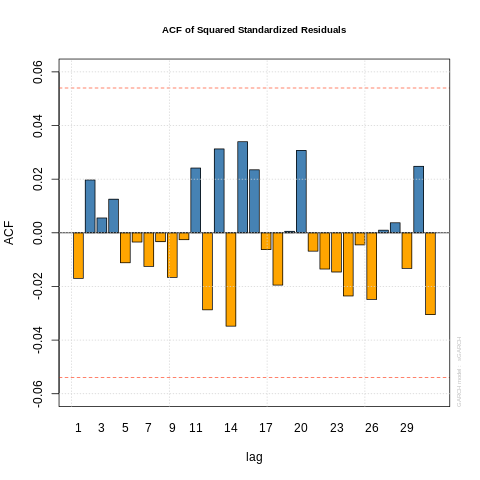

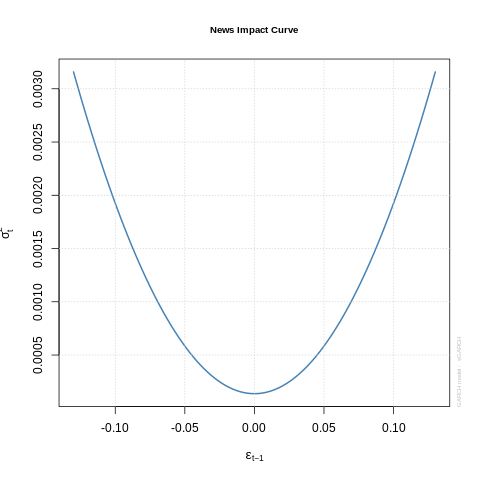

In [ ]:
%%R
plot(garch_fit, which = 1)
plot(garch_fit, which = 2)
plot(garch_fit, which = 3)
plot(garch_fit, which = 4)
plot(garch_fit, which = 5)
plot(garch_fit, which = 6)
plot(garch_fit, which = 7)
plot(garch_fit, which = 8)
plot(garch_fit, which = 9)
plot(garch_fit, which = 10)
plot(garch_fit, which = 11)
plot(garch_fit, which = 12)

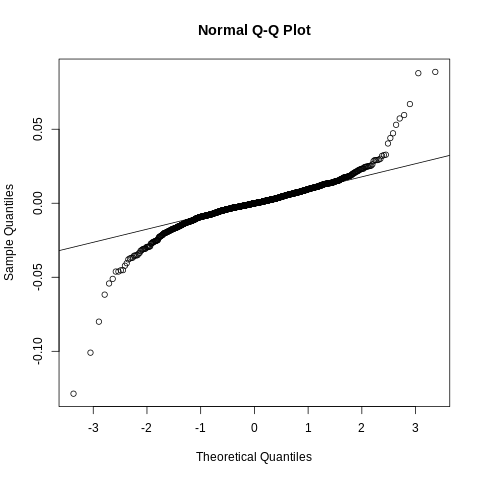

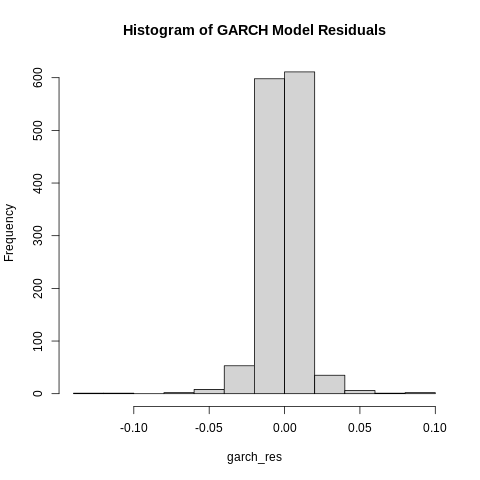

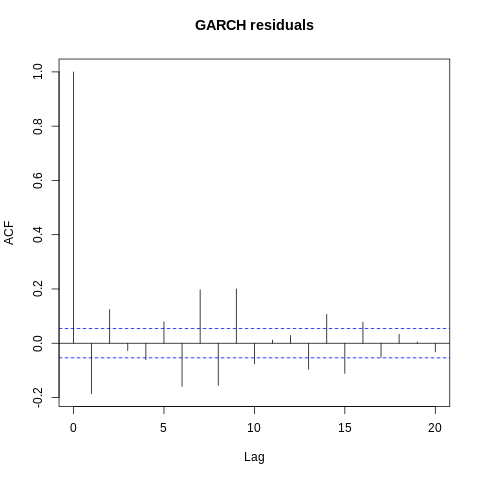

In [ ]:
%%R
################### Residual analysis for GARCH model #########################
garch_res <- residuals(garch_fit)

# Normality probability plot
qqnorm(garch_res)
qqline(garch_res)

# Histogram
hist(garch_res, main = "Histogram of GARCH Model Residuals")

acf(garch_res, lag.max=20, main = 'GARCH residuals')


In [ ]:
%%R
Box.test(garch_res, lag=20, type="Ljung-Box")


	Box-Ljung test

data:  garch_res
X-squared = 317.96, df = 20, p-value < 2.2e-16



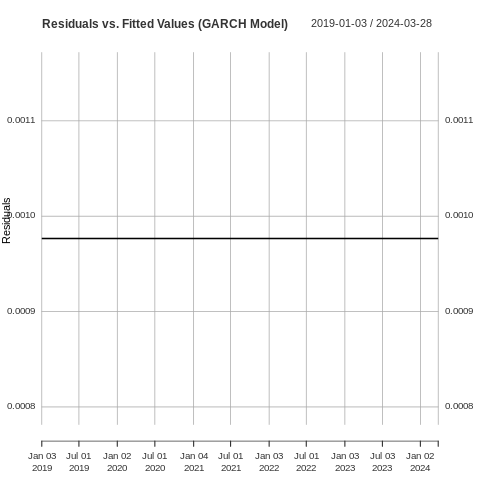

In [ ]:
%%R
# Residuals vs. Fitted Values
plot(fitted(garch_fit), garch_res, main = "Residuals vs. Fitted Values (GARCH Model)", xlab = "Fitted Values", ylab = "Residuals")

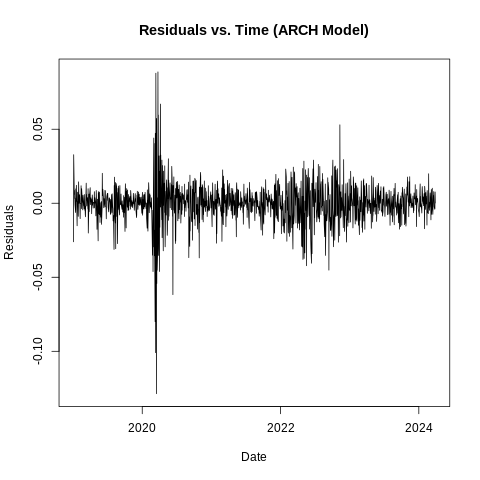

In [ ]:
%%R
# Residuals vs. Time
plot(index(data_diff), garch_res, main = "Residuals vs. Time (GARCH Model)", xlab = "Date", ylab = "Residuals", type ='l')

# 9. Forecast the next 10 days of volatility using both fitted models.

Comparing and contrast the forecast results from the ARCH and GARCH models.


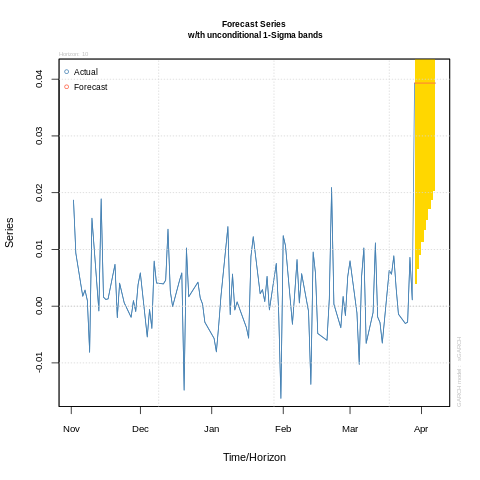

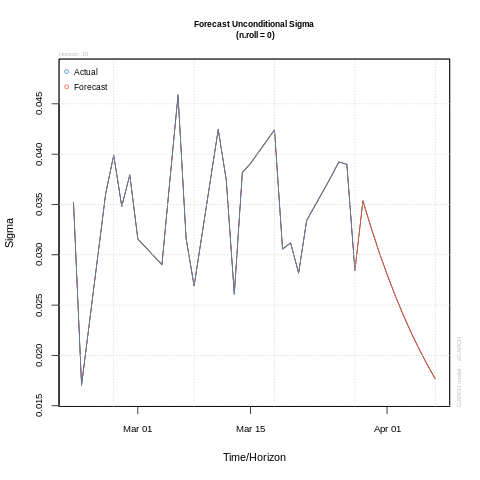

In [ ]:
%%R

# Forecast volatility using ARCH model
arch_forecast <- ugarchforecast(arch_fit, n.ahead = 10)

plot(arch_forecast, which = 1)
plot(arch_forecast, which = 3)

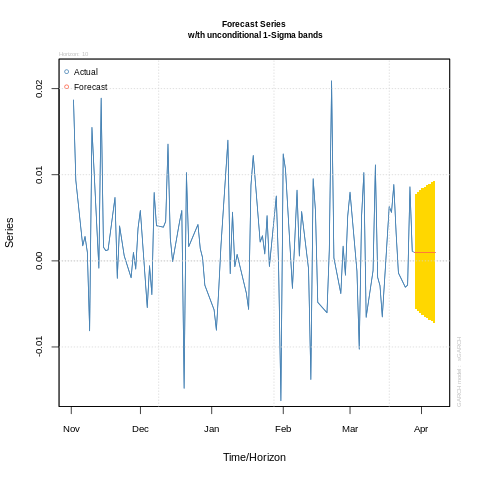

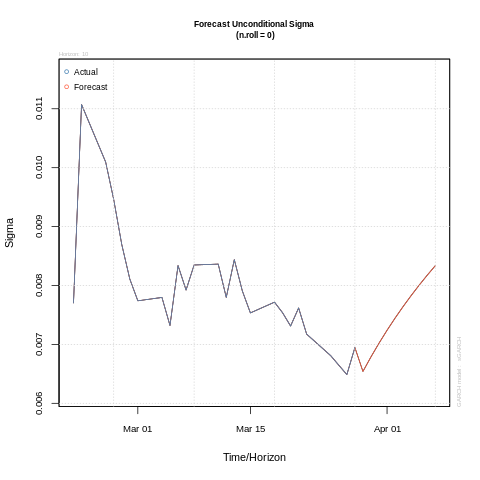

In [ ]:
%%R

#plot(arch_forecast, main = 'Arch forecast')

# Forecast volatility using GARCH model
garch_forecast <- ugarchforecast(garch_fit, n.head = 10)

plot(garch_forecast, which = 1)
plot(garch_forecast, which = 3)

The GARCH forecast seems to be giving a more reasonable estimate of the series that the ARCH model.

The ARCH model shoots up to very high values for the forecast while the GARCH forecast give a result within the series values.